<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load,-Inspect-&amp;-Clean" data-toc-modified-id="Load,-Inspect-&amp;-Clean-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load, Inspect &amp; Clean</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Feature-Analysis" data-toc-modified-id="Feature-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature Analysis</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Feature-Preprocessing" data-toc-modified-id="Feature-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Preprocessing</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Fitting-Logistic-Regression" data-toc-modified-id="Fitting-Logistic-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fitting Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li><li><span><a href="#Fitting-Decision-Tree" data-toc-modified-id="Fitting-Decision-Tree-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fitting Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Tuning-Decision-Tree" data-toc-modified-id="Tuning-Decision-Tree-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Tuning Decision Tree</a></span></li><li><span><a href="#Decision-Tree-Autotune" data-toc-modified-id="Decision-Tree-Autotune-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Decision Tree Autotune</a></span></li></ul></li><li><span><a href="#Fitting-Random-Forest" data-toc-modified-id="Fitting-Random-Forest-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Fitting Random Forest</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Dropping-highly-cormrelated-features" data-toc-modified-id="Dropping-highly-cormrelated-features-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Dropping highly cormrelated features</a></span></li><li><span><a href="#Evaluating-model-using-Recursive-Feature-Elimination-(RFE)" data-toc-modified-id="Evaluating-model-using-Recursive-Feature-Elimination-(RFE)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Evaluating model using Recursive Feature Elimination (RFE)</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Customer Churn

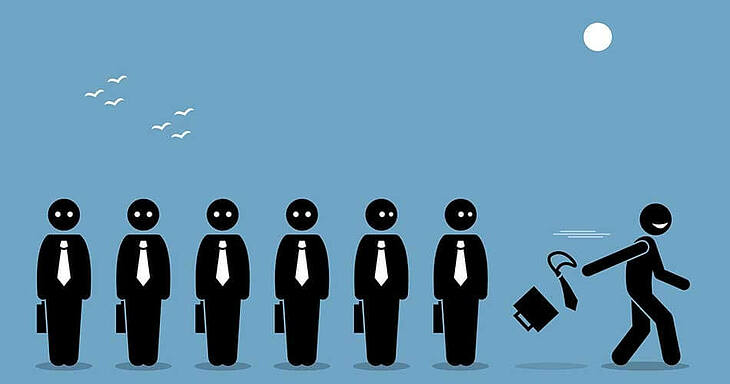

The objective of this task is to predict **customer churn** and to identify the **factors** that contribute to the churning of a customer.

The dataset is that of a telecommunications company who have provided several details about the plan and the features subscribed by the customer. The column _Churn_ indicates whether the customer has churned in the past three months or not. Our objective is to build a predictive model that can accurately predict the churn of customers.

For a better understanding of the dataset, refer [here](https://www.kaggle.com/blastchar/telco-customer-churn)

In [292]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Load, Inspect & Clean

In [293]:
telco = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [294]:
telco.shape

(7043, 21)

In [295]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [296]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [297]:
telco.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [298]:
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [299]:
column_unique_values = [{col : telco[col].unique()} for col in telco.columns]
column_unique_values

[{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
         '8361-LTMKD', '3186-AJIEK'], dtype=object)},
 {'gender': array(['Female', 'Male'], dtype=object)},
 {'SeniorCitizen': array([0, 1], dtype=int64)},
 {'Partner': array(['Yes', 'No'], dtype=object)},
 {'Dependents': array(['No', 'Yes'], dtype=object)},
 {'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
         21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
          9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
         36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
         54, 51, 26,  0, 39], dtype=int64)},
 {'PhoneService': array(['No', 'Yes'], dtype=object)},
 {'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object)},
 {'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object)},
 {'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object)},
 {'OnlineB

In [300]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

For certain customers, the value of the feature **TotalCharges** is empty. So we inspect further to see whether it is a mistake or a valid entry

In [301]:
len([i for i in telco.TotalCharges if i == ' '])

11

In [302]:
pd.to_numeric(telco.TotalCharges, errors='coerce').isnull().sum()

11

In [303]:
total_charges_filled_zeros = pd.to_numeric(telco.TotalCharges, errors='coerce').fillna(0)

In [304]:
# Index of empty 'TotalCharges' rows

total_charges_empty_index = pd.isnull(pd.DataFrame(pd.to_numeric(telco.TotalCharges, errors='coerce'))).any(1).nonzero()[0]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [305]:
total_charges_calc_values = []
for ind in total_charges_empty_index:
    print(telco.loc[ind,'tenure'], telco.loc[ind,'MonthlyCharges'])
    total_charges_calc_values.append(telco.loc[ind,'tenure']*telco.loc[ind,'MonthlyCharges'])
total_charges_calc_values

0 52.55
0 20.25
0 80.85
0 25.75
0 56.05
0 19.85
0 25.35
0 20.0
0 19.7
0 73.35
0 61.9


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [306]:
telco[telco.tenure == 0].shape

(11, 21)

We see that all those customers have a tenure of zero. We also see that these are the only customers who have a tenure of zero.
It mostly means that their first payment is still not due. Thus we can impute these values with zero which seems to be perfect.

## Exploratory Data Analysis

### Feature Analysis

Below graph shows the overall precentage of churners in the company.

&#8594;  It is a good sign for the company as we have more non-churners than churners.

No     73.46
Yes    26.54
Name: Churn, dtype: float64


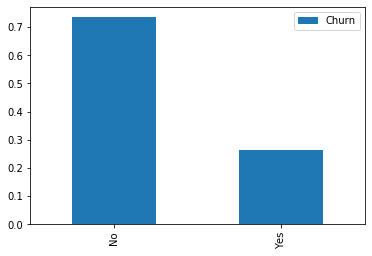

In [307]:
print(round(telco.Churn.value_counts(normalize=True)*100, 2))
telco.Churn.value_counts(normalize=True).plot(kind='bar', legend = True)
plt.show()

We see that the mean tenure of non-churners is higher than chuners.\
This might be a good sign for the company as it **seems that their long term customers stay loyal.**

Also, churners in general have a higher monthlycharge.\
One possible way to go over this is to check if we **overwhelm the customers with a lot of products, which leads to them churning after a period of time.**

In [308]:
telco.groupby('Churn').mean().round(2)

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.13,37.57,61.27
Yes,0.25,17.98,74.44


In [309]:
telco.groupby('Churn').std().round(2)

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.33,24.11,31.09
Yes,0.44,19.53,24.67


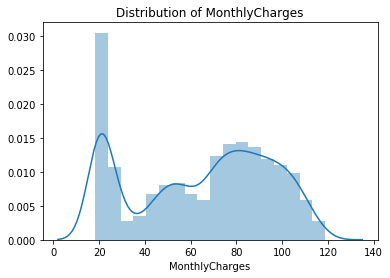

In [310]:
sns.distplot(telco.MonthlyCharges)
plt.title('Distribution of MonthlyCharges')
plt.show()

The variable MonthlyCharges needs to be scaled.

We see a spike towards the lower end of $20 and also a dense distribution towards the upper end.\
The density of the medium range fare seems to be relatively low.

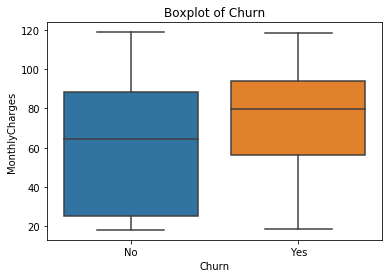

In [311]:
sns.boxplot(data = telco,
            x = 'Churn',  
            y = 'MonthlyCharges'
            )
plt.title('Boxplot of Churn')
plt.show()

As seen in the groupby result above, this plot also confirms the fact that churners have a costlier plan than non-churners

In [312]:
round(telco.gender.value_counts(normalize=True)*100, 2)

Male      50.48
Female    49.52
Name: gender, dtype: float64

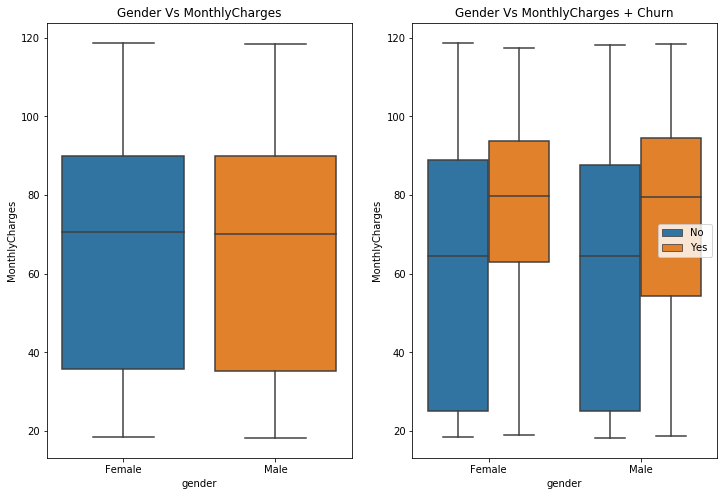

In [313]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title('Gender Vs MonthlyCharges')
sns.boxplot(data = telco,
            x = 'gender',
            y = 'MonthlyCharges'
           )
plt.subplot(1,2,2)
sns.boxplot(data = telco,
            x = 'gender',
            y = 'MonthlyCharges',
            hue = 'Churn'
           )
plt.legend(loc = 'best')
plt.title('Gender Vs MonthlyCharges + Churn')
plt.show()

In [314]:
print(telco[telco.gender == 'Male']['MonthlyCharges'].mean())
print(telco[telco.gender == 'Female']['MonthlyCharges'].mean())

64.32748241912773
65.20424311926602


Based on the above plot it looks like we cannot discriminate churners based on gender

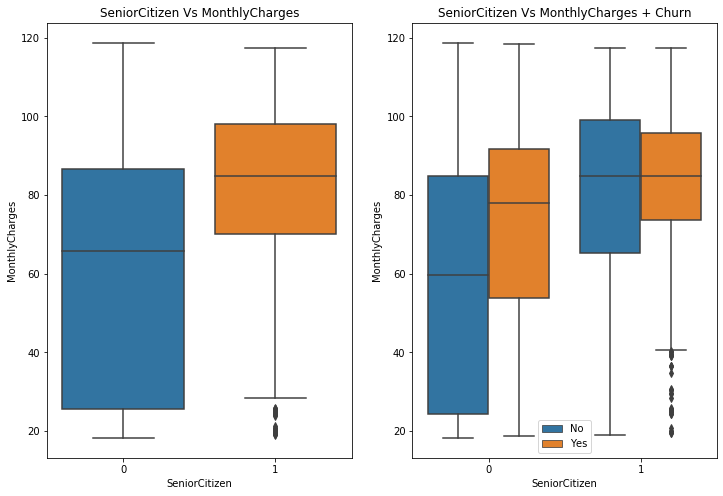

In [315]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title('SeniorCitizen Vs MonthlyCharges')
sns.boxplot(data = telco,
            x = 'SeniorCitizen',
            y = 'MonthlyCharges',
           )
plt.subplot(1,2,2)
plt.title('SeniorCitizen Vs MonthlyCharges + Churn')
sns.boxplot(data = telco,
            x = 'SeniorCitizen',
            y = 'MonthlyCharges',
            hue = 'Churn',
           )
plt.legend(loc = 'lower center')
plt.show()

Thus it is seen that senior citizens have a heftier monthly fee than non-senior citizens.\
As expected, churners in the non seniorzitizen category have a higher monthly charge.

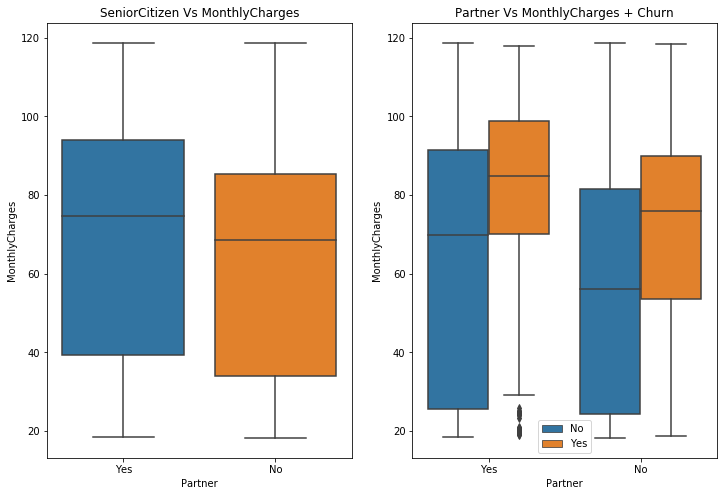

In [316]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title('SeniorCitizen Vs MonthlyCharges')
sns.boxplot(data = telco,
            x = 'Partner',
            y = 'MonthlyCharges',
           )
plt.subplot(1,2,2)
plt.title('Partner Vs MonthlyCharges + Churn')
sns.boxplot(data = telco,
            x = 'Partner',
            y = 'MonthlyCharges',
            hue = 'Churn',
           )
plt.legend(loc = 'lower center')
plt.show()

&#8594;  Those with partners spend more than those without partners.

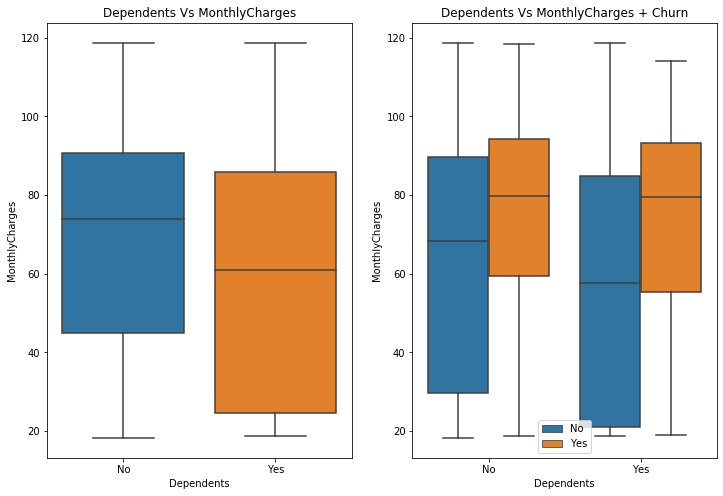

In [317]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title('Dependents Vs MonthlyCharges')
sns.boxplot(data = telco,
            x = 'Dependents',
            y = 'MonthlyCharges',
           )
plt.subplot(1,2,2)
plt.title('Dependents Vs MonthlyCharges + Churn')
sns.boxplot(data = telco,
            x = 'Dependents',
            y = 'MonthlyCharges',
            hue = 'Churn',
           )
plt.legend(loc = 'lower center')
plt.show()

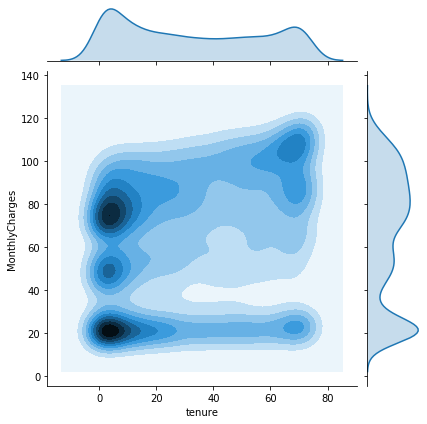

In [318]:
sns.jointplot(data = telco,
              x = 'tenure',
              y = 'MonthlyCharges',
              kind = 'kde'
             )
plt.show()
# Not Useful

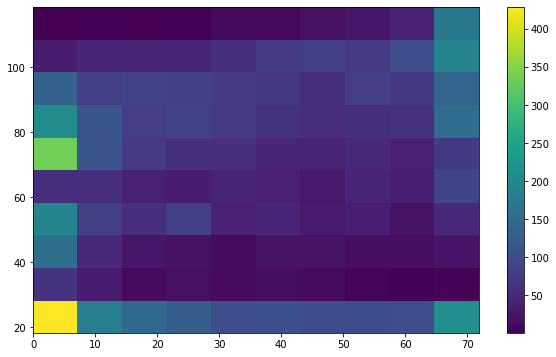

In [319]:
plt.figure(figsize=(10,6))
plt.hist2d(telco.tenure,
           telco.MonthlyCharges
          )
plt.colorbar()
plt.show()

In [320]:
telco.tenure.value_counts().shape

(73,)

In [321]:
telco[(telco.tenure <= 8) & (telco.MonthlyCharges < 30)].shape

(487, 21)

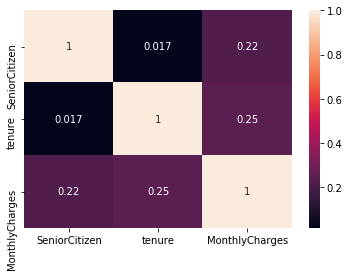

In [322]:
sns.heatmap(telco.corr(), annot = True)
plt.show()

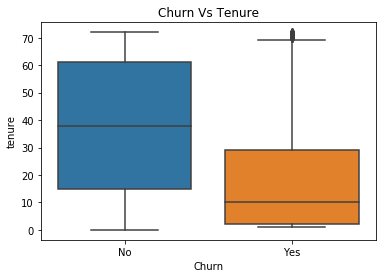

In [323]:
sns.boxplot(data = telco,
            y = 'tenure',
            x = 'Churn'
             )
plt.title('Churn Vs Tenure')
plt.show()

We see that almost 75% of the data distribution for the churners is for a tenure less than 30 years. So it is fair to say that the newly acquired customers contribute to churn more.

 &#8594;  Any recent changes in customer acquisition strategies can be revisited and revised if needed.

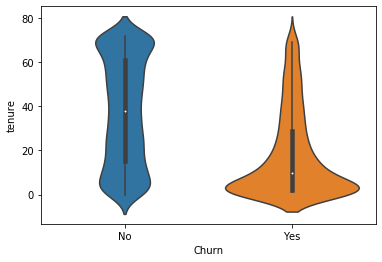

In [324]:
sns.violinplot(data = telco,
              y = 'tenure',
              x = 'Churn'
             )
plt.show()

We analyse the PaymentMethod to see if we can derive any insights

In [325]:
sorted_payment = telco.groupby('PaymentMethod')['MonthlyCharges'].mean().sort_values()
sorted_payment

PaymentMethod
Mailed check                 43.917060
Credit card (automatic)      66.512385
Bank transfer (automatic)    67.192649
Electronic check             76.255814
Name: MonthlyCharges, dtype: float64

In [326]:
sorted_payment.index

Index(['Mailed check', 'Credit card (automatic)', 'Bank transfer (automatic)',
       'Electronic check'],
      dtype='object', name='PaymentMethod')

In [327]:
telco.groupby('PaymentMethod')['MonthlyCharges'].sum().sort_values()

PaymentMethod
Mailed check                  70794.30
Credit card (automatic)      101231.85
Bank transfer (automatic)    103745.45
Electronic check             180345.00
Name: MonthlyCharges, dtype: float64

From the above results, it is observed that a huge sum is paid through Electronic check and the least sum is paid through Mailed Check

The below figure shows the distribution of 'MonthlyCharges' according to different 'PaymentMethod'.\
Additionally, the churners and non-churners are represented by colored data points.

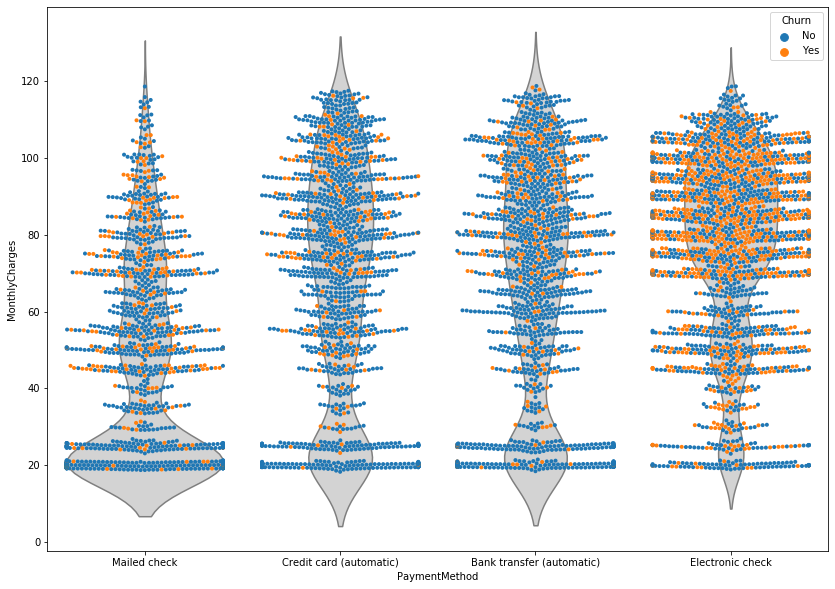

In [328]:
plt.figure(figsize=(14,10))
sns.violinplot(data = telco, x = 'PaymentMethod', y = 'MonthlyCharges', order = list(sorted_payment.index), inner = None, color='lightgray')
sns.swarmplot(data = telco, x = 'PaymentMethod', y = 'MonthlyCharges', order = list(sorted_payment.index), hue='Churn', size = 4)
plt.show()

The plot has been sorted based on the mean of the 'MonthlyCharges' paid using different 'PaymentMethods'.\
Next, we have imposed a swarmplot over a violin plot to the see overall distribution as well as to visualise the individula data points.

 &#8594;  We see that Mailed Check is mostly used by customers with a MonthlyCharge around 20 dollars to 30 dollars.\
 &#8594;  Also Electronic Check is preferred by customers with a MonthlyCharge more than $60. It also consists of a lot of churners.

In [329]:
telco[(telco.PaymentMethod == 'Mailed check') & (telco.MonthlyCharges < 30)].shape

(784, 21)

In [330]:
telco[(telco.PaymentMethod == 'Mailed check') & (telco.MonthlyCharges < 30)].shape[0] / telco[(telco.PaymentMethod == 'Mailed check')].shape[0]*100

48.635235732009924

In [331]:
telco[(telco.PaymentMethod == 'Electronic check') & (telco.MonthlyCharges >= 60)].shape

(1781, 21)

In [332]:
telco[(telco.PaymentMethod == 'Electronic check') & (telco.MonthlyCharges >= 60)].shape[0] / telco[(telco.PaymentMethod == 'Electronic check')].shape[0]*100

75.30655391120507

 &#8594;  Around 50% of customers paying through mailed check, have less than 30 dollars as their monthly charge.\
 &#8594;  75% of the customers paying through Electronic check have a monthly charge greater of equal to 60 dollars.

In [333]:
telco.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


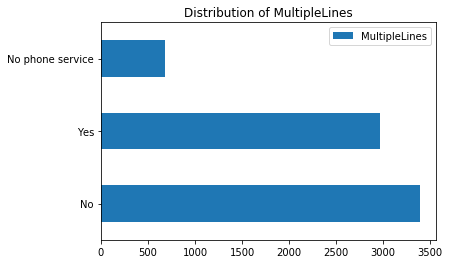

In [334]:
print(telco.MultipleLines.value_counts())
telco.MultipleLines.value_counts().plot(kind = 'barh')
plt.legend()
plt.title('Distribution of MultipleLines')
plt.show()

In [335]:
#Only Phone
telco[(telco.PhoneService == 'Yes') & (telco.InternetService == 'No')]['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [336]:
# Only Internet
telco[(telco.PhoneService == 'No') & (telco.InternetService != 'No')]['Churn'].value_counts()

No     512
Yes    170
Name: Churn, dtype: int64

In [337]:
# Both Services
telco[(telco.PhoneService == 'Yes') & (telco.InternetService != 'No')]['Churn'].value_counts()

No     3249
Yes    1586
Name: Churn, dtype: int64

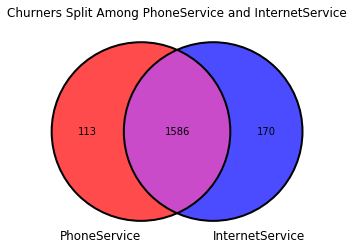

In [338]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

churn_only_phone = telco[(telco.PhoneService == 'Yes') & (telco.InternetService == 'No')]['Churn'].value_counts()['Yes']
churn_only_internet = telco[(telco.PhoneService == 'No') & (telco.InternetService != 'No')]['Churn'].value_counts()['Yes']
churn_both = telco[(telco.PhoneService == 'Yes') & (telco.InternetService != 'No')]['Churn'].value_counts()['Yes']

venn2_unweighted(subsets = (churn_only_phone, churn_only_internet, churn_both), 
                 set_labels = ('PhoneService', 'InternetService'), 
                 set_colors=('r', 'b'), alpha = 0.7)

venn2_circles(subsets = (1,1,1))

plt.title('Churners Split Among PhoneService and InternetService')
plt.show()

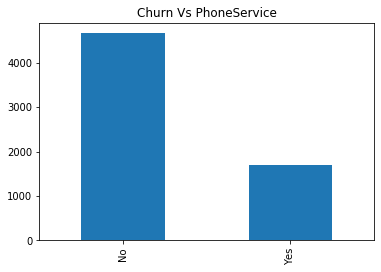

In [339]:
plt.figure()
#telco.PhoneService.value_counts().plot(kind = 'bar')
telco[telco.PhoneService == 'Yes']['Churn'].value_counts().plot(kind = 'bar')
plt.title('Churn Vs PhoneService')
plt.show()

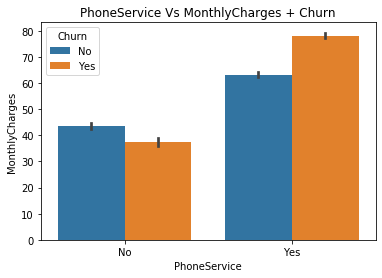

In [340]:
sns.barplot(data = telco,
            x = 'PhoneService',
            y = 'MonthlyCharges',
            hue = 'Churn'
           )
plt.title('PhoneService Vs MonthlyCharges + Churn')
plt.show()

In [341]:
telco.PhoneService .value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [342]:
print(telco[(telco.PhoneService == 'Yes')]['Churn'].value_counts()['Yes'])
print(telco[(telco.PhoneService == 'No')]['Churn'].value_counts()['Yes'])

1699
170


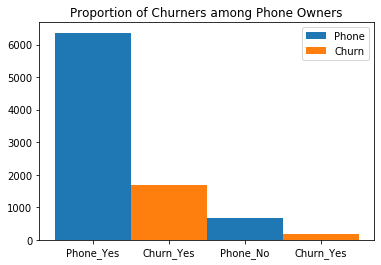

In [343]:
xticks = [1,2]
width = 0.5

plt.figure()
plt.bar(x = xticks, height = telco.PhoneService.value_counts().to_list(), 
        width = width)
plt.bar(x = [i+width for i in xticks], 
        height = [telco[telco.PhoneService == 'Yes']['Churn'].value_counts()['Yes'], telco[telco.PhoneService == 'No']['Churn'].value_counts()['Yes']],
        width = width)
plt.xticks(xticks+[i+width for i in xticks], ['Phone_Yes', 'Phone_No']+['Churn_Yes', 'Churn_Yes'])
plt.legend(labels=['Phone','Churn'])
plt.title('Proportion of Churners among Phone Owners')
plt.show()

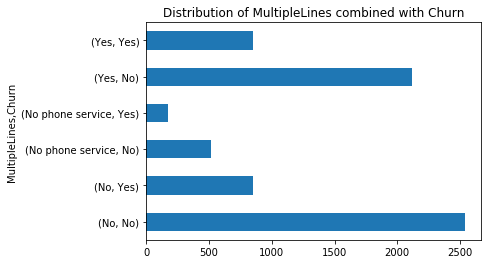

In [344]:
telco.groupby(['MultipleLines', 'Churn']).size().plot(kind = 'barh')
plt.title('Distribution of MultipleLines combined with Churn')
plt.show()

In [345]:
print(pd.DataFrame(telco.groupby(['PhoneService', 'InternetService']).size()))
print(pd.DataFrame(telco.groupby(['PhoneService', 'InternetService', 'Churn']).size()))

                                 0
PhoneService InternetService      
No           DSL               682
Yes          DSL              1739
             Fiber optic      3096
             No               1526
                                       0
PhoneService InternetService Churn      
No           DSL             No      512
                             Yes     170
Yes          DSL             No     1450
                             Yes     289
             Fiber optic     No     1799
                             Yes    1297
             No              No     1413
                             Yes     113


 &#8594;  Half of the people using Fibre optic internet service churn.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


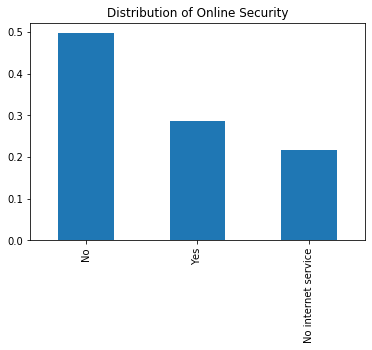

In [346]:
print(telco.OnlineSecurity.value_counts())
telco.OnlineSecurity.value_counts(normalize=True).plot(kind = 'bar')
plt.title('Distribution of Online Security')
plt.show()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


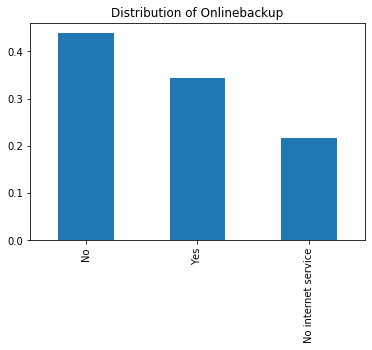

In [347]:
print(telco.OnlineBackup.value_counts())
telco.OnlineBackup.value_counts(normalize=True).plot(kind = 'bar')
plt.title('Distribution of Onlinebackup')
plt.show()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


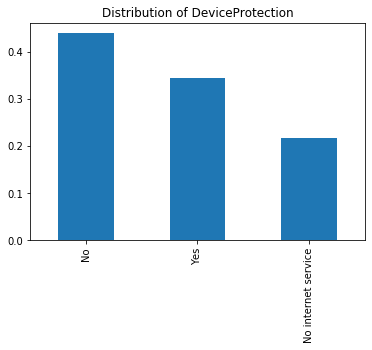

In [348]:
print(telco.DeviceProtection.value_counts())
telco.DeviceProtection.value_counts(normalize=True).plot(kind = 'bar')
plt.title('Distribution of DeviceProtection')
plt.show()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


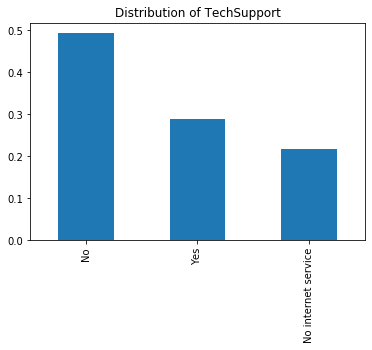

In [349]:
print(telco.TechSupport.value_counts())
telco.TechSupport.value_counts(normalize=True).plot(kind = 'bar')
plt.title('Distribution of TechSupport')
plt.show()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


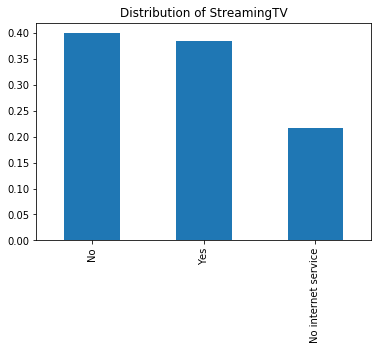

In [350]:
print(telco.StreamingTV.value_counts())
telco.StreamingTV.value_counts(normalize=True).plot(kind = 'bar')
plt.title('Distribution of StreamingTV')
plt.show()

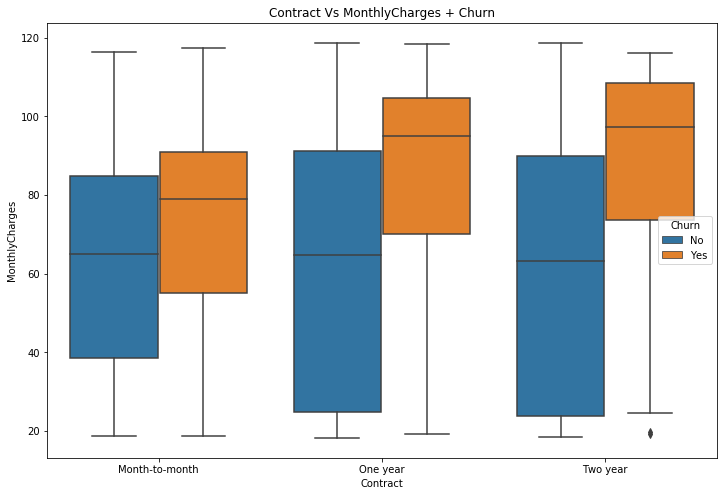

In [351]:
plt.figure(figsize=(12,8))
sns.boxplot(data = telco,
            x = 'Contract',
            y = 'MonthlyCharges',
            hue = 'Churn'
            )
plt.title('Contract Vs MonthlyCharges + Churn')
plt.show()

In [352]:
telco.groupby(['Contract']).size()

Contract
Month-to-month    3875
One year          1473
Two year          1695
dtype: int64

In [353]:
telco.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [354]:
round((telco.groupby(['PhoneService', 'Churn']).size() / telco.groupby(['PhoneService']).size())*100, 2)

PhoneService  Churn
No            No       75.07
              Yes      24.93
Yes           No       73.29
              Yes      26.71
dtype: float64

 &#8594;  Below, we see that almost 42% of month-to-month onctract custmers churn

In [355]:
round((telco.groupby(['Contract', 'Churn']).size() / telco.groupby(['Contract']).size())*100, 2)

Contract        Churn
Month-to-month  No       57.29
                Yes      42.71
One year        No       88.73
                Yes      11.27
Two year        No       97.17
                Yes       2.83
dtype: float64

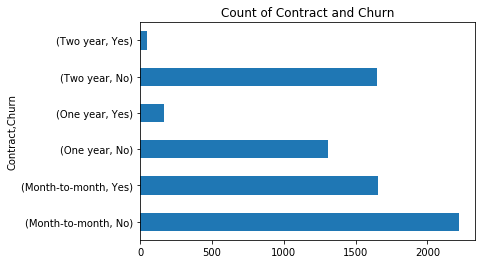

In [356]:
telco.groupby(['Contract', 'Churn']).size().plot(kind = 'barh')
plt.title('Count of Contract and Churn')
plt.show()

 &#8594; It is found below that almost 45% of the people paying through Electronic check churn

In [357]:
round((telco.groupby(['PaymentMethod', 'Churn']).size() / telco.groupby(['PaymentMethod']).size())*100, 2)

PaymentMethod              Churn
Bank transfer (automatic)  No       83.29
                           Yes      16.71
Credit card (automatic)    No       84.76
                           Yes      15.24
Electronic check           No       54.71
                           Yes      45.29
Mailed check               No       80.89
                           Yes      19.11
dtype: float64

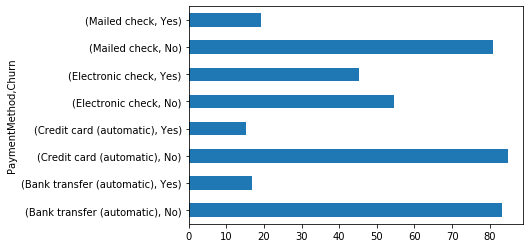

In [358]:
round((telco.groupby(['PaymentMethod', 'Churn']).size() / telco.groupby(['PaymentMethod']).size())*100, 2).plot(kind = 'barh')
plt.show()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


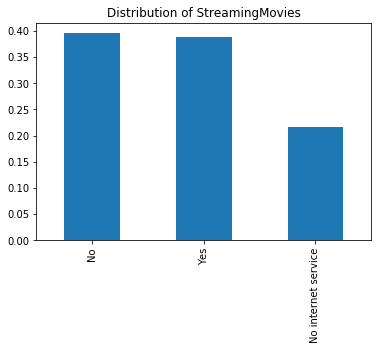

In [359]:
print(telco.StreamingMovies.value_counts())
telco.StreamingMovies.value_counts(normalize=True).plot(kind = 'bar')
plt.title('Distribution of StreamingMovies')
plt.show()

## Feature Engineering

In [360]:
telco.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Family Size** is defined as the sum of binary values of the dependents and partner column.

In [361]:
def get_family_size(param):
    param = param.to_list()
    return param.count('Yes') + 1

In [362]:
fea_FamilySize = telco[['Partner', 'Dependents']].apply(get_family_size, axis = 1)
fea_FamilySize.head(15)

0     2
1     1
2     1
3     1
4     1
5     1
6     2
7     1
8     2
9     2
10    3
11    1
12    2
13    1
14    1
dtype: int64

This feature captures the **total number of services** the customer has opted for.

In [363]:
def get_total_opted_services(param):
    param = param.to_list()
    try:
        return (param.count('Yes') + param.count('DSL') + param.count('Fiber optic'))
    except:
        print(type(param))

In [364]:
fea_TotalOptedServices = telco[['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].apply(get_total_opted_services, axis = 1)
fea_TotalOptedServices.head(10)

0    2
1    4
2    4
3    4
4    2
5    6
6    5
7    2
8    7
9    4
dtype: int64

This feature generates a ratio of the PhoneServices and InternetServices the customer has opted for.

In [365]:
def get_ServiceRatios(param):
    param = param.to_list()
    phone = param[:2]
    internet = param[2:]
    phone_ratio = phone.count('Yes') / len(phone) 
    internet_ratio = (internet.count('Yes') + internet.count('DSL') + internet.count('Fiber optic')) / len(internet)
    
    return [phone_ratio, internet_ratio]

In [366]:
fea_ServiceRatio = telco[['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].apply(get_ServiceRatios, axis = 1, result_type = 'expand')
fea_PhoneRatio = fea_ServiceRatio[0]
fea_InternetRatio = fea_ServiceRatio[1]

This features captures tenure in terms of year

In [367]:
def get_TenureYear(param):
    return round((param / 12),1)

In [368]:
fea_TenureYear = telco['tenure'].apply(get_TenureYear)
fea_TenureYear.head(10)

0    0.1
1    2.8
2    0.2
3    3.8
4    0.2
5    0.7
6    1.8
7    0.8
8    2.3
9    5.2
Name: tenure, dtype: float64

This feature captures the number of months remaining in a customer's contract

In [369]:
def get_ContractMonthsRemaining(param):
    if param[0] == 'Month-to-month':
        return 1
    elif param[0] == 'One year':
        return 12 - (param[1] % 12)
    else:
        return 24 - (param[1] % 24)

In [370]:
fea_ContractMonthsRemaining = telco[['Contract', 'tenure']].apply(get_ContractMonthsRemaining, axis = 1)
fea_ContractMonthsRemaining.head(10)

0     1
1     2
2     1
3     3
4     1
5     1
6     1
7     1
8     1
9    10
dtype: int64

This feature calculates the avergage cost per service

In [371]:
fea_AvgCostPerService = telco.MonthlyCharges / fea_TotalOptedServices
fea_AvgCostPerService.head(10)

0    14.925000
1    14.237500
2    13.462500
3    10.575000
4    35.350000
5    16.608333
6    17.820000
7    14.875000
8    14.971429
9    14.037500
dtype: float64

This feature indicates whether a customer uses an automated payment method or not.

An electronic check can be classified as semi automatic and thus has an intermediate value

In [372]:
def get_AutomatedPayment(param):
    if param == 'Mailed check':
        return 0
    elif param == 'Electronic check':
        return 1
    else:
        return 2

In [373]:
fea_AutomatedPayment = telco['PaymentMethod'].apply(get_AutomatedPayment)
fea_AutomatedPayment.head(10)

0    1
1    0
2    0
3    2
4    1
5    1
6    2
7    0
8    1
9    2
Name: PaymentMethod, dtype: int64

## Feature Preprocessing

In [374]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

In [375]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [376]:
telco_df = telco.copy()

In [377]:
# Adding Engineered Features
engineered_features = pd.DataFrame({'AutomatedPayment' : fea_AutomatedPayment.to_list(),
                                    'ContractMonthsRemaining' : fea_ContractMonthsRemaining.to_list(),
                                    'FamilySize' : fea_FamilySize.to_list(),
                                    'InternetRatio' : fea_InternetRatio.to_list(),
                                    'PhoneRatio' : fea_PhoneRatio.to_list(),
                                    'TenureYear' : fea_TenureYear.to_list(),
                                    'TotalOptedServices' : fea_TotalOptedServices.to_list(),
                                    'AvgCostPerService': fea_AvgCostPerService.to_list()
                                   })

In [378]:
engineered_features

,AutomatedPayment,ContractMonthsRemaining,FamilySize,InternetRatio,PhoneRatio,TenureYear,TotalOptedServices,AvgCostPerService
0,1,1,2,0.285714,0.0,0.1,2,14.925000
1,0,2,1,0.428571,0.5,2.8,4,14.237500
2,0,1,1,0.428571,0.5,0.2,4,13.462500
3,2,3,1,0.571429,0.0,3.8,4,10.575000
4,1,1,1,0.142857,0.5,0.2,2,35.350000
...,...,...,...,...,...,...,...,...
7038,0,12,3,0.857143,1.0,2.0,8,10.600000
7039,2,12,3,0.714286,1.0,6.0,7,14.742857
7040,1,1,3,0.285714,0.0,0.9,2,14.800000
7041,0,1,2,0.142857,1.0,0.3,3,24.800000


In [379]:
# Onehot encoding a binary categorical variable and dropping one column to prevent the dummy variable trap is 
# the same as label encoding it.

Label Encoding Binary Categorical Features

In [380]:
binary_cat_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cat_columns:
    telco_df[col] = telco_df[col].replace({'Yes' : 1, 'No' : 0})

telco_df['gender'].replace({'Male' : 1, 'Female' : 0}, inplace = True)

One Hot Encoding multi-valued categorical variables

In [381]:
telco_df = pd.get_dummies(telco_df, 
                          columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 
                          prefix_sep = "_")

telco_df = pd.get_dummies(telco_df, 
                          columns = ['Contract', 'PaymentMethod'], 
                          prefix_sep = "_",
                          drop_first = True
                         )

In [382]:
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors = 'coerce').fillna(0) 

Below, we omit certain columns to prevent the dummy variable trap

In [383]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic ch

In [384]:
omit_columns = [col for col in telco_df.columns if col.find('No internet service') != -1 or col.find('No phone service') != -1 ]
omit_columns

['MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [385]:
telco_df.drop(columns = omit_columns, inplace = True)

In [386]:
sorted(telco_df.columns)

['Churn',
 'Contract_One year',
 'Contract_Two year',
 'Dependents',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MonthlyCharges',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'PhoneService',
 'SeniorCitizen',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'StreamingTV_No',
 'StreamingTV_Yes',
 'TechSupport_No',
 'TechSupport_Yes',
 'TotalCharges',
 'customerID',
 'gender',
 'tenure']

In [387]:
telco_df = pd.concat([telco_df,engineered_features], axis = 1)
telco_df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,AutomatedPayment,ContractMonthsRemaining,FamilySize,InternetRatio,PhoneRatio,TenureYear,TotalOptedServices,AvgCostPerService
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,1,1,2,0.285714,0.0,0.1,2,14.925000
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,1,0,2,1,0.428571,0.5,2.8,4,14.237500
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,1,0,1,1,0.428571,0.5,0.2,4,13.462500
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,0,0,2,3,1,0.571429,0.0,3.8,4,10.575000
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,1,1,1,0.142857,0.5,0.2,2,35.350000
5,9305-CDSKC,0,0,0,0,8,1,1,99.65,820.50,...,1,0,1,1,1,0.571429,1.0,0.7,6,16.608333
6,1452-KIOVK,1,0,0,1,22,1,1,89.10,1949.40,...,0,0,2,1,2,0.428571,1.0,1.8,5,17.820000
7,6713-OKOMC,0,0,0,0,10,0,0,29.75,301.90,...,0,1,0,1,1,0.285714,0.0,0.8,2,14.875000
8,7892-POOKP,0,0,1,0,28,1,1,104.80,3046.05,...,1,0,1,1,2,0.714286,1.0,2.3,7,14.971429
9,6388-TABGU,1,0,0,1,62,1,0,56.15,3487.95,...,0,0,2,10,2,0.428571,0.5,5.2,4,14.037500


In [388]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#tenure_scaler = scaler.fit(telco_df.tenure.to_numpy().reshape(-1,1))
#monthly_scaler = scaler.fit(telco_df.MonthlyCharges.to_numpy().reshape(-1,1))
#total_scaler = scaler.fit(telco_df.TotalCharges.to_numpy().reshape(-1,1))
ContractMonthsRemaining_scaler = scaler.fit(telco_df.ContractMonthsRemaining.to_numpy().reshape(-1,1))
TenureYear_scaler = scaler.fit(telco_df.TenureYear.to_numpy().reshape(-1,1))
TotalOptedServices_scaler = scaler.fit(telco_df.TotalOptedServices.to_numpy().reshape(-1,1))
AvgCostPerService_scaler = scaler.fit(telco_df.AvgCostPerService.to_numpy().reshape(-1,1))
AutomatedPayment_scaler = scaler.fit(telco_df.AutomatedPayment.to_numpy().reshape(-1,1))

#telco_df.tenure = tenure_scaler.transform(telco_df.tenure.to_numpy().reshape(-1,1))
#telco_df.MonthlyCharges = monthly_scaler.transform(telco_df.MonthlyCharges.to_numpy().reshape(-1,1))
#telco_df.TotalCharges = total_scaler.transform(telco_df.TotalCharges.to_numpy().reshape(-1,1))

telco_df.ContractMonthsRemaining = ContractMonthsRemaining_scaler.fit_transform(telco_df.ContractMonthsRemaining.to_numpy().reshape(-1,1))
telco_df.TenureYear = TenureYear_scaler.fit_transform(telco_df.TenureYear.to_numpy().reshape(-1,1))
telco_df.TotalOptedServices = TotalOptedServices_scaler.fit_transform(telco_df.TotalOptedServices.to_numpy().reshape(-1,1))
telco_df.AvgCostPerService = AvgCostPerService_scaler.fit_transform(telco_df.AvgCostPerService.to_numpy().reshape(-1,1))
telco_df.AutomatedPayment = AutomatedPayment_scaler.fit_transform(telco_df.AutomatedPayment.to_numpy().reshape(-1,1))

telco_df.FamilySize = scaler.fit_transform(telco_df.FamilySize.to_numpy().reshape(-1,1))
telco_df.PhoneRatio = scaler.fit_transform(telco_df.PhoneRatio.to_numpy().reshape(-1,1))
telco_df.InternetRatio = scaler.fit_transform(telco_df.InternetRatio.to_numpy().reshape(-1,1))

telco_df.tenure = scaler.fit_transform(telco_df.tenure.to_numpy().reshape(-1,1))
telco_df.MonthlyCharges = scaler.fit_transform(telco_df.MonthlyCharges.to_numpy().reshape(-1,1))
telco_df.TotalCharges = scaler.fit_transform(telco_df.TotalCharges.to_numpy().reshape(-1,1))

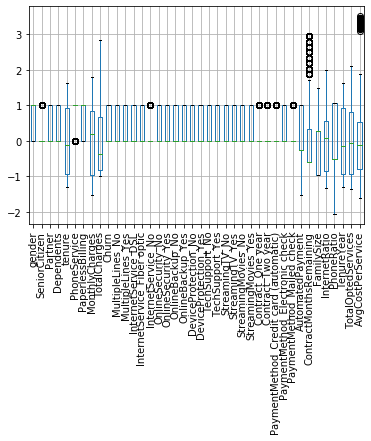

In [389]:
telco_df.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [390]:
telco_mod = telco_df.copy()

In [391]:
telco_mod.drop(columns='customerID', inplace = True)

In [392]:
telco_mod.iloc[:5,30:]

,PaymentMethod_Electronic check,PaymentMethod_Mailed check,AutomatedPayment,ContractMonthsRemaining,FamilySize,InternetRatio,PhoneRatio,TenureYear,TotalOptedServices,AvgCostPerService
0,1,0,-0.261852,-0.593317,0.266209,-0.388596,-2.061669,-1.270186,-0.928083,-0.439223
1,0,1,-1.530233,-0.439518,-0.958423,0.084585,-0.505697,0.049884,-0.063239,-0.567169
2,0,1,-1.530233,-0.593317,-0.958423,0.084585,-0.505697,-1.221294,-0.063239,-0.711400
3,0,0,1.006528,-0.285718,-0.958423,0.557767,-2.061669,0.538799,-0.063239,-1.248774
4,1,0,-0.261852,-0.593317,-0.958423,-0.861777,-0.505697,-1.221294,-0.928083,3.361944


In [393]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#telco_mod = scaler.fit_transform()

In [394]:
telco_mod.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No                           uint8
MultipleLines_Yes                          uint8
InternetService_DSL                        uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No                          uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No                            uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No                        uint8
DeviceProtection_Yes

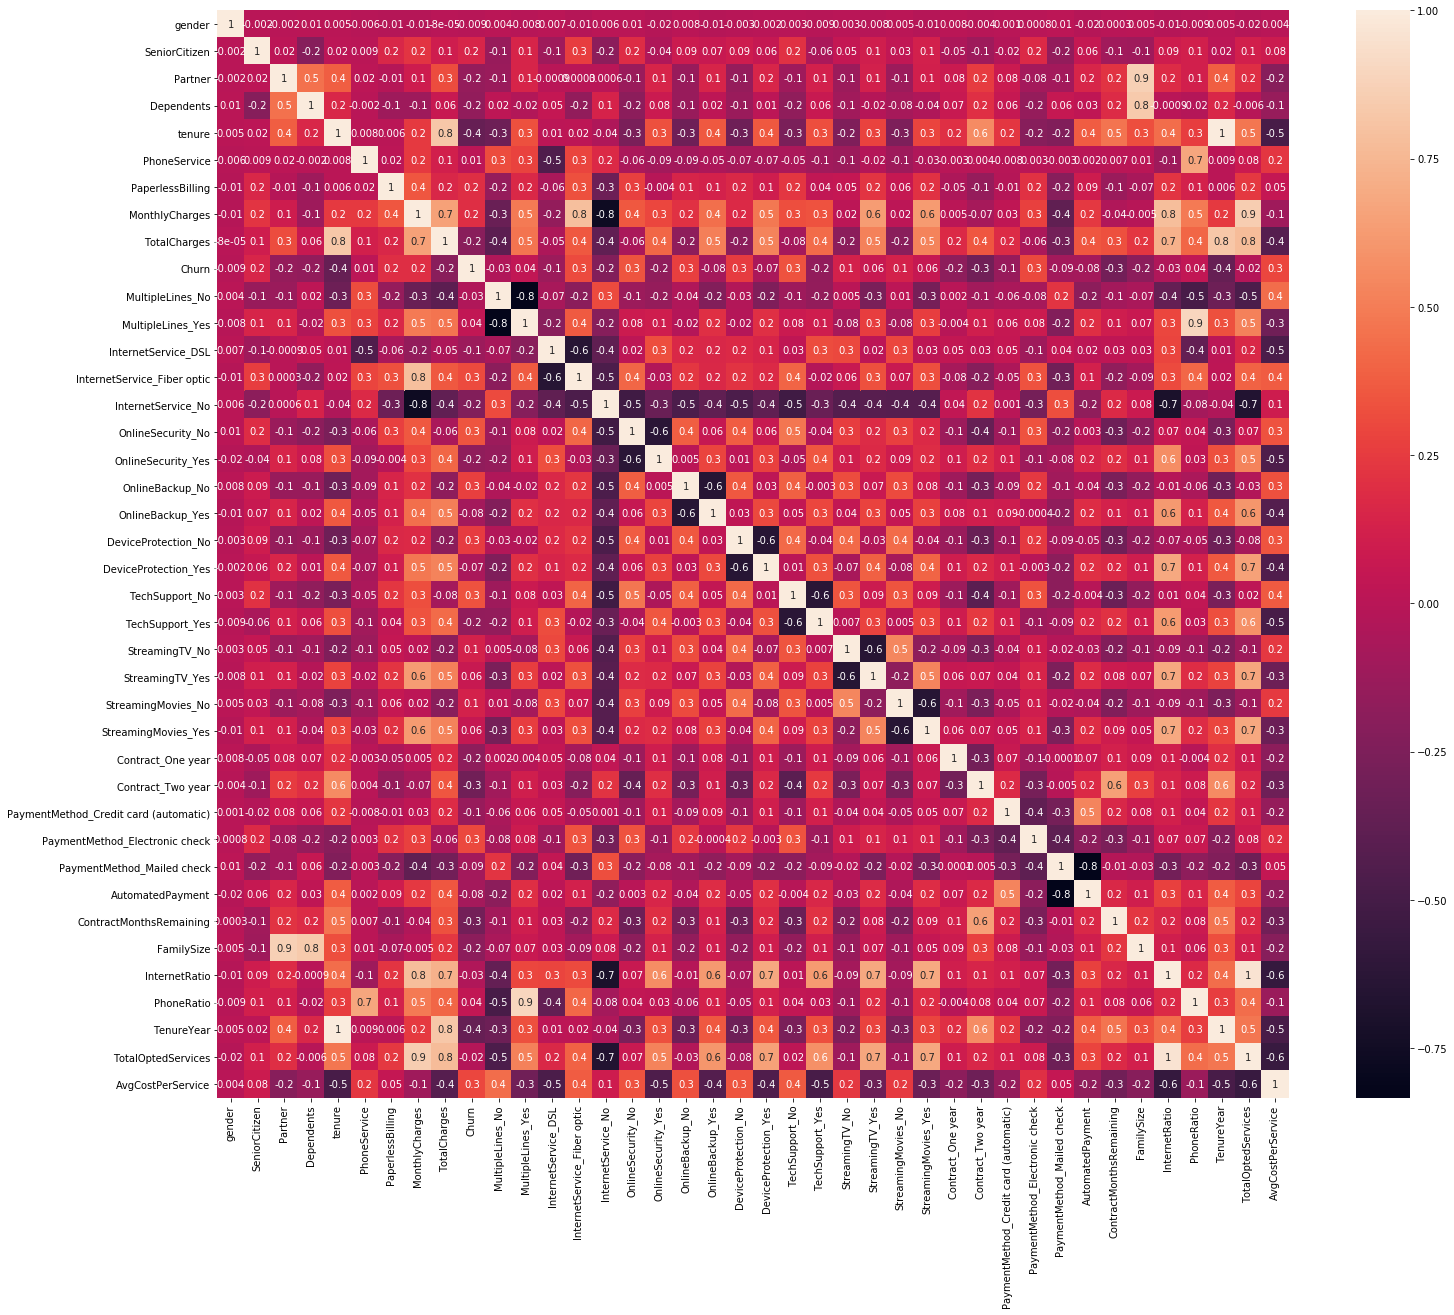

In [395]:
plt.figure(figsize=(24,20))
sns.heatmap(telco_mod.corr(), annot = True, fmt='.1g')
plt.show()

## Modelling

In [396]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

X = telco_mod.drop(columns = 'Churn')
y = telco_mod.Churn

X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

In [397]:
print(X.shape, y.shape, X_train.shape, X_test.shape)

(7043, 39) (7043,) (5634, 39) (1409, 39)


In [398]:
def get_metrics(y_test, y_pred):
    print('Accuracy : ', round(accuracy_score(y_test, y_pred)*100, 2))
    print('Precision : ', round(precision_score(y_test, y_pred)*100, 2))
    print('Recall : ', round(recall_score(y_test, y_pred)*100, 2))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    print('roc_auc : ', round(auc(false_positive_rate, true_positive_rate)*100, 2))
    print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))

In [399]:
telco_mod.describe().round(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,AutomatedPayment,ContractMonthsRemaining,FamilySize,InternetRatio,PhoneRatio,TenureYear,TotalOptedServices,AvgCostPerService
count,7043.0,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.5,0.16,0.48,0.30,0.00,0.9,0.59,-0.00,-0.00,0.27,...,0.34,0.23,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,0.5,0.37,0.50,0.46,1.00,0.3,0.49,1.00,1.00,0.44,...,0.47,0.42,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.0,0.00,0.00,0.00,-1.32,0.0,0.00,-1.55,-1.01,0.00,...,0.00,0.00,-1.53,-0.59,-0.96,-1.33,-2.06,-1.32,-1.36,-1.61
25%,0.0,0.00,0.00,0.00,-0.95,1.0,0.00,-0.97,-0.83,0.00,...,0.00,0.00,-0.26,-0.59,-0.96,-0.86,-0.51,-0.93,-0.93,-0.80
50%,1.0,0.00,0.00,0.00,-0.14,1.0,1.00,0.19,-0.39,0.00,...,0.00,0.00,-0.26,-0.59,0.27,0.08,-0.51,-0.15,-0.06,-0.12
75%,1.0,0.00,1.00,1.00,0.92,1.0,1.00,0.83,0.66,1.00,...,1.00,0.00,1.01,0.33,0.27,0.56,1.05,0.93,0.80,0.52
max,1.0,1.00,1.00,1.00,1.61,1.0,1.00,1.79,2.83,1.00,...,1.00,1.00,1.01,2.94,1.49,1.98,1.05,1.61,2.10,3.51


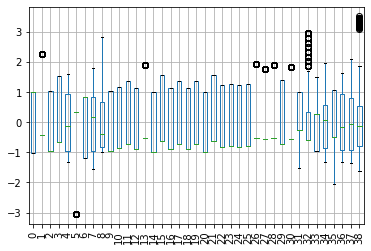

In [400]:
#telco_mod.boxplot()
pd.DataFrame(X_std).boxplot()
plt.xticks(rotation = 90)
plt.show()

In [401]:
pd.DataFrame(X_std).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.01,-0.44,-0.97,-0.65,-1.32,-3.05,-1.21,-1.55,-1.01,-0.96,...,-0.71,-0.54,-1.53,-0.59,-0.96,-1.33,-2.06,-1.32,-1.36,-1.61
25%,-1.01,-0.44,-0.97,-0.65,-0.95,0.33,-1.21,-0.97,-0.83,-0.96,...,-0.71,-0.54,-0.26,-0.59,-0.96,-0.86,-0.51,-0.93,-0.93,-0.80
50%,0.99,-0.44,-0.97,-0.65,-0.14,0.33,0.83,0.19,-0.39,-0.96,...,-0.71,-0.54,-0.26,-0.59,0.27,0.08,-0.51,-0.15,-0.06,-0.12
75%,0.99,-0.44,1.03,1.53,0.92,0.33,0.83,0.83,0.66,1.04,...,1.41,-0.54,1.01,0.33,0.27,0.56,1.05,0.93,0.80,0.52
max,0.99,2.27,1.03,1.53,1.61,0.33,0.83,1.79,2.83,1.04,...,1.41,1.84,1.01,2.94,1.49,1.98,1.05,1.61,2.10,3.51


In [402]:
print(y_train.value_counts()) 
print(y_test.value_counts())

0    4128
1    1506
Name: Churn, dtype: int64
0    1046
1     363
Name: Churn, dtype: int64


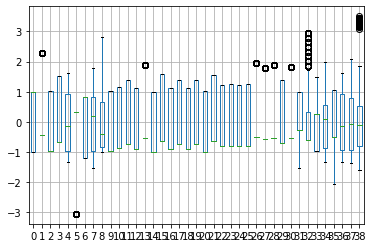

In [403]:
pd.DataFrame(X_std).boxplot()

### Fitting Logistic Regression

We fit a logistic regression model using grid search. The optimal set of parameters is given below

In [404]:
# Fitting LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

lr_param_grid = {'solver' : ['sag', 'lbfgs', 'newton-cg', 'liblinear', 'saga'],
                 'penalty' : ['l2', 'l1', 'elastic-net'],
                 'C' : [0.08, 0.1, 0.09],
                 'max_iter' : [100, 300, 500],
                }

lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, n_jobs=-1)

try:
    lr_grid_search.fit(X_train, y_train)
except Exception as e:
    print(e)

print(lr_grid_search.best_params_)

{'C': 0.09, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [405]:
lr_grid_search.best_params_

{'C': 0.09, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [406]:
get_metrics(y_test, lr_grid_search.best_estimator_.predict(X_test))

Accuracy :  80.41
Precision :  65.26
Recall :  51.24
roc_auc :  70.89
Confusion Matrix : 
 [[947  99]
 [177 186]]


In [407]:
print("Accuracy in Training Set : {}".format(round(lr_grid_search.best_estimator_.score(X_train, y_train)*100), 2))

Accuracy in Training Set : 81.0


In [408]:
print("Accuracy in Test Set : {}".format(round(lr_grid_search.best_estimator_.score(X_test, y_test)*100), 2))
#lr_grid_search.best_estimator_.score(X_test, y_test)*100

Accuracy in Test Set : 80.0


#### Feature Importance

In [409]:
lr_grid_search.best_estimator_.coef_.ravel()

array([-0.00699586,  0.05117595,  0.        , -0.06599775, -0.80991171,
       -0.0276892 ,  0.16009464,  0.        ,  0.08188116, -0.1714441 ,
        0.        ,  0.        ,  0.38088743, -0.05261918,  0.11376568,
        0.        ,  0.0225468 ,  0.        ,  0.        ,  0.01061062,
        0.13470197,  0.        ,  0.        ,  0.14054134,  0.        ,
        0.15041999, -0.13518637, -0.33925   , -0.05458709,  0.14557235,
       -0.00844588,  0.        , -0.30197506, -0.00876911,  0.        ,
        0.        , -0.09715222,  0.        ,  0.09271139])

In [410]:
coeff_sorted_index = np.argsort(list(lr_grid_search.best_estimator_.coef_.ravel()))

From the below figure, we infer that InternetService, OnlineSecurity are some of the features considered to be important by the model

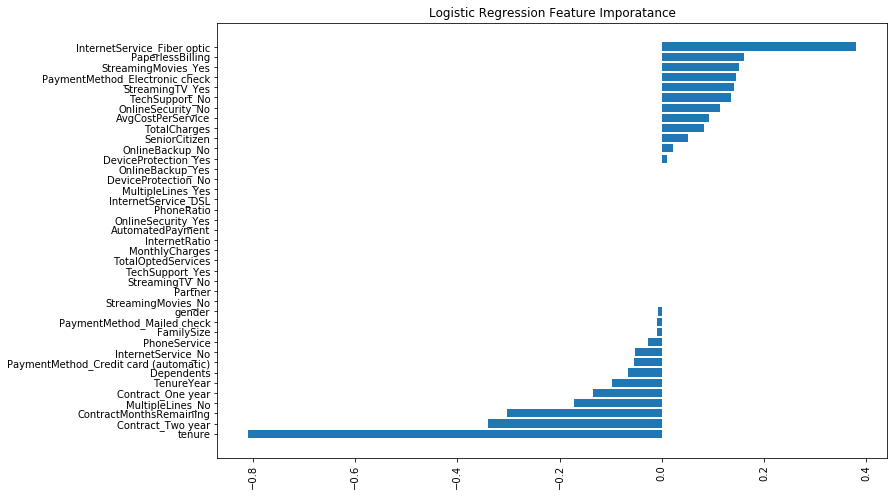

In [411]:
plt.figure(figsize=(12,8))
plt.barh(list(X.columns[coeff_sorted_index]), sorted(list(lr_grid_search.best_estimator_.coef_.ravel())))
plt.xticks(rotation = 90)
plt.title('Logistic Regression Feature Imporatance')
plt.show()

### Fitting Decision Tree

We use the same grid search approach to help fit the decision tree with the optimal set of parameters.

In [412]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [413]:
dt.score(X_test, y_test)

0.7395315826827538

In [414]:
get_metrics(y_test, dt.predict(X_test))

Accuracy :  73.95
Precision :  49.43
Recall :  47.66
roc_auc :  65.37
Confusion Matrix : 
 [[869 177]
 [190 173]]


#### Tuning Decision Tree

In [415]:
dt = DecisionTreeClassifier()

dt_param_grid = {'criterion' : ['gini', 'entropy'],
                 'max_depth' : [2, 4, 6, 8, 10, 12],
                 'min_samples_split' : [0.1, 0.2, 0.3, 0.4],
                 'min_samples_leaf' : [0.1, 0.2, 0.3, 0.4, 0.5],
                 'max_features' : ["sqrt", "auto", "log2"]
                }

dt_grid_search = GridSearchCV(dt, dt_param_grid, n_jobs = -1)

try:
    dt_grid_search.fit(X_train, y_train)
except Exception as e:
    print(e)

print(dt_grid_search.best_params_)
print("Training Set Results : {}".format(dt_grid_search.best_estimator_.score(X_train, y_train)*100))
print("Test Set Results : {}".format(dt_grid_search.best_estimator_.score(X_test, y_test)*100))

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
Training Set Results : 76.10933617323393
Test Set Results : 77.07594038325053


In [417]:
get_metrics(y_test, dt_grid_search.best_estimator_.predict(X_test))

Accuracy :  77.08
Precision :  64.29
Recall :  24.79
roc_auc :  60.01
Confusion Matrix : 
 [[996  50]
 [273  90]]


In [418]:
dt_grid_search.best_estimator_.score(X_train, y_train)

0.7610933617323393

#### Decision Tree Autotune

In [419]:
def autotune_decisiontree(X_train, y_train, X_test, y_test, param_grid):

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    
    for metric in param_grid:
        train_res = []
        test_res = []
        for metric_value in param_grid[metric]:
            if metric == 'criterion':
                dt = DecisionTreeClassifier(criterion = metric_value)
            elif metric == 'max_depth':
                dt = DecisionTreeClassifier(max_depth = metric_value)
            elif metric == 'min_samples_split':
                dt = DecisionTreeClassifier(min_samples_split = metric_value)
            elif metric == 'min_samples_leaf':
                dt = DecisionTreeClassifier(min_samples_leaf = metric_value)
            else:
                dt = DecisionTreeClassifier(max_features = metric_value)
                
            dt.fit(X_train, y_train)

            train_res.append(accuracy_score(y_train, dt.predict(X_train)))
            test_res.append(accuracy_score(y_test, dt.predict(X_test)))
        
        plt.title(metric)
        plt.plot(train_res, marker = 'o', label = 'train')
        plt.plot(test_res, marker = 'o', label = 'test')
        plt.legend()
        plt.xticks(ticks = list(range(len(train_res))), labels=param_grid[metric], rotation = 90)
        plt.ylabel('Accuracy')
        plt.show()

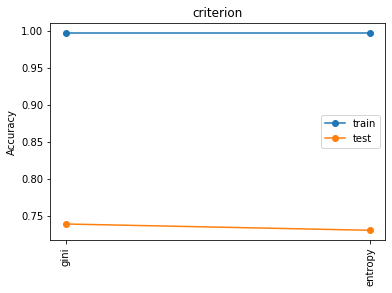

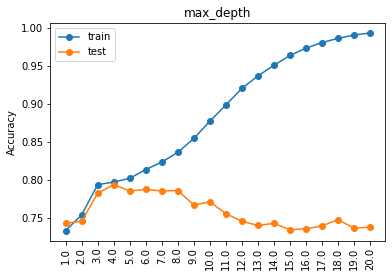

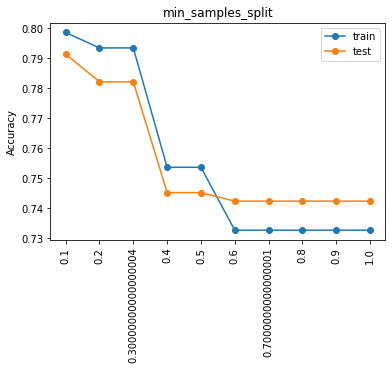

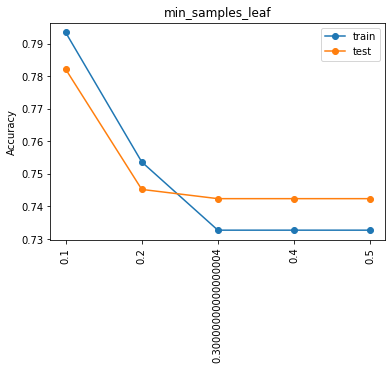

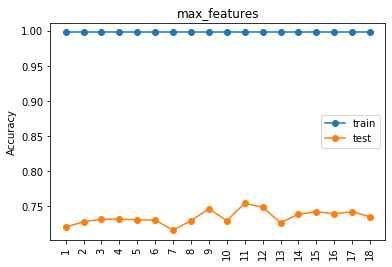

In [420]:
# First grid used
dt_param_grid = {'criterion' : ['gini', 'entropy'],
                 'max_depth' : np.linspace(1, 20, 20, endpoint=True),
                 'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
                 'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
                 'max_features' : list(range(1,int(X_train.shape[1]/2))) #{“auto”, “sqrt”, “log2”}
                }

autotune_decisiontree(X_train, y_train, X_test, y_test, dt_param_grid)

#criterion = ['gini', 'entropy']
#ax_depth = np.linspace(1, 20, 20, endpoint=True)
#min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
#in_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
#max_features = list(range(1,X_train.shape[1]))

#tuners = [criterion, max_depth, min_samples_split, min_samples_leaf, max_features]

### Fitting Random Forest

In [424]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [432]:
get_metrics(y_test, rf.predict(X_test))

Accuracy :  80.2
Precision :  66.54
Recall :  46.56
roc_auc :  69.22
Confusion Matrix : 
 [[961  85]
 [194 169]]


In [431]:
print('Random Forest Accuracy on test set : ', round(rf.score(X_test, y_test), 2)*100)

Random Forest Accuracy on test set :  80.0


## Feature Selection

In [433]:
telco_feat = telco_df.drop(columns='customerID')

In [434]:
telco_feat.describe().round(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,AutomatedPayment,ContractMonthsRemaining,FamilySize,InternetRatio,PhoneRatio,TenureYear,TotalOptedServices,AvgCostPerService
count,7043.0,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.5,0.16,0.48,0.30,0.00,0.9,0.59,-0.00,-0.00,0.27,...,0.34,0.23,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,0.5,0.37,0.50,0.46,1.00,0.3,0.49,1.00,1.00,0.44,...,0.47,0.42,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.0,0.00,0.00,0.00,-1.32,0.0,0.00,-1.55,-1.01,0.00,...,0.00,0.00,-1.53,-0.59,-0.96,-1.33,-2.06,-1.32,-1.36,-1.61
25%,0.0,0.00,0.00,0.00,-0.95,1.0,0.00,-0.97,-0.83,0.00,...,0.00,0.00,-0.26,-0.59,-0.96,-0.86,-0.51,-0.93,-0.93,-0.80
50%,1.0,0.00,0.00,0.00,-0.14,1.0,1.00,0.19,-0.39,0.00,...,0.00,0.00,-0.26,-0.59,0.27,0.08,-0.51,-0.15,-0.06,-0.12
75%,1.0,0.00,1.00,1.00,0.92,1.0,1.00,0.83,0.66,1.00,...,1.00,0.00,1.01,0.33,0.27,0.56,1.05,0.93,0.80,0.52
max,1.0,1.00,1.00,1.00,1.61,1.0,1.00,1.79,2.83,1.00,...,1.00,1.00,1.01,2.94,1.49,1.98,1.05,1.61,2.10,3.51


Inspecting **Feature Variances**

In [435]:
(telco_feat / telco_feat.mean()).var().round(2).sort_values()

PhoneService                             1.100000e-01
PaperlessBilling                         6.900000e-01
gender                                   9.800000e-01
OnlineSecurity_No                        1.010000e+00
TechSupport_No                           1.030000e+00
Partner                                  1.070000e+00
MultipleLines_No                         1.080000e+00
OnlineBackup_No                          1.280000e+00
InternetService_Fiber optic              1.280000e+00
DeviceProtection_No                      1.280000e+00
MultipleLines_Yes                        1.370000e+00
StreamingTV_No                           1.510000e+00
StreamingMovies_No                       1.530000e+00
StreamingMovies_Yes                      1.580000e+00
StreamingTV_Yes                          1.600000e+00
OnlineBackup_Yes                         1.900000e+00
DeviceProtection_Yes                     1.910000e+00
InternetService_DSL                      1.910000e+00
PaymentMethod_Electronic che

### Dropping highly cormrelated features

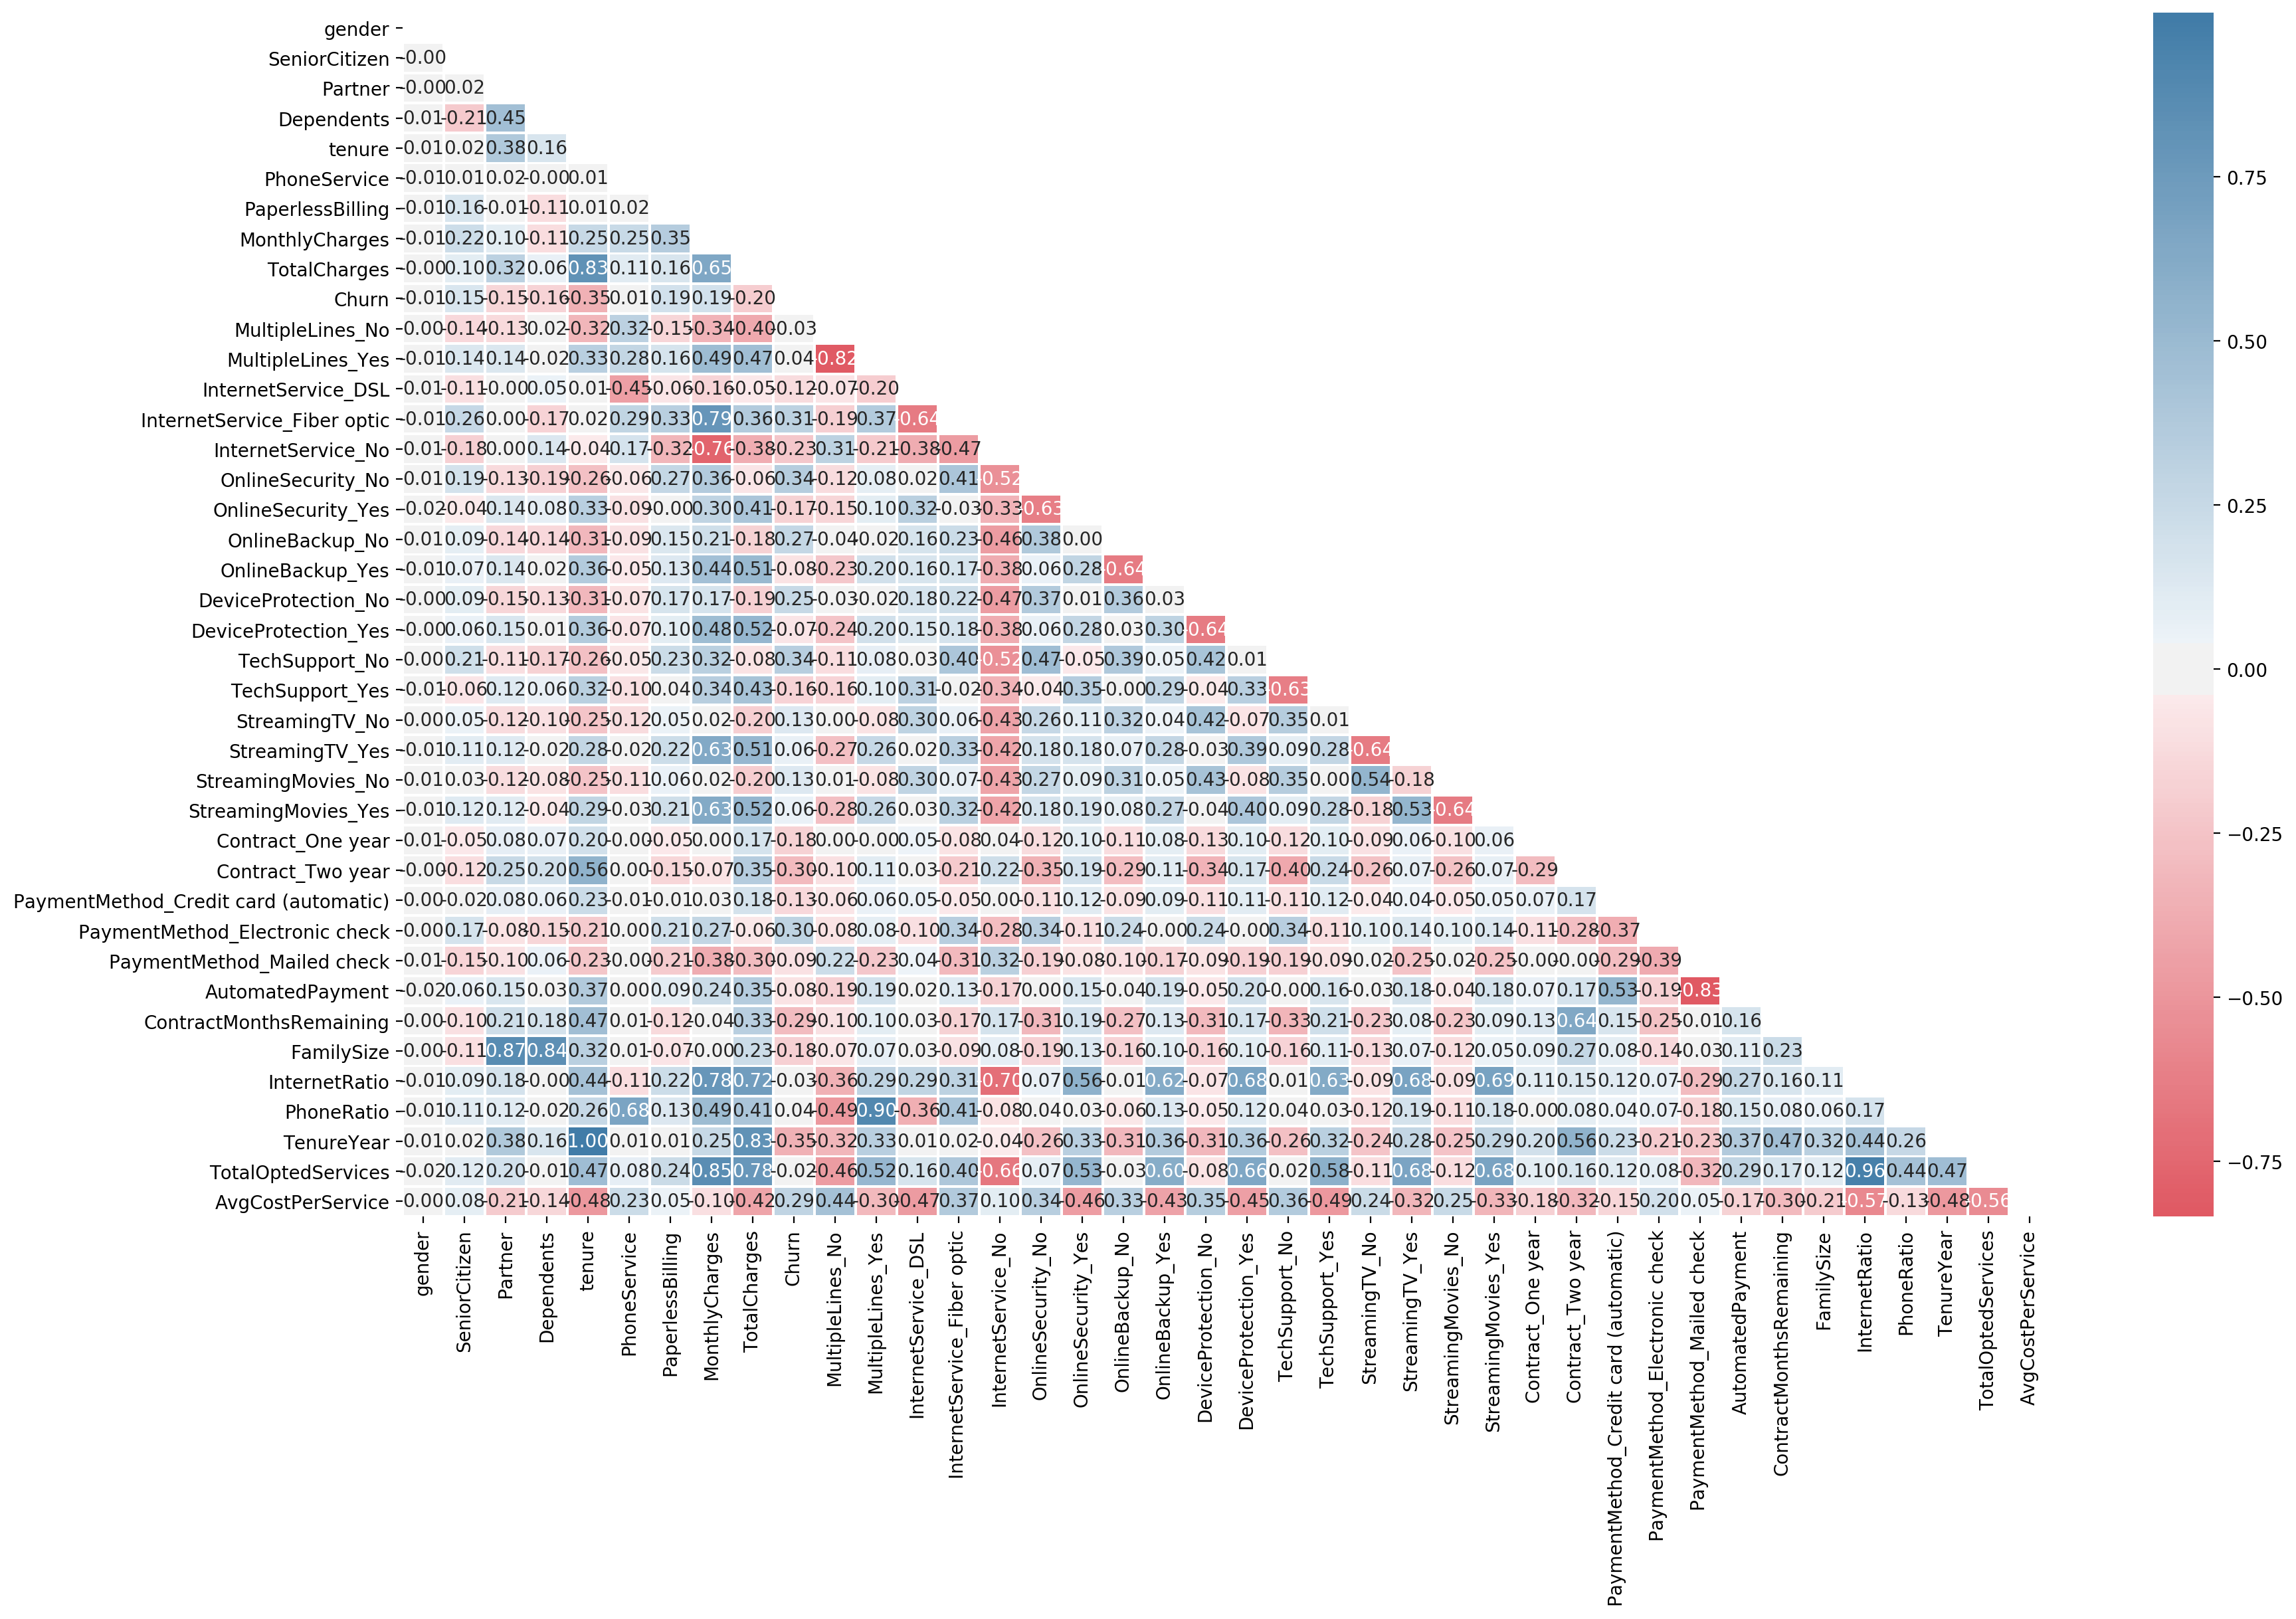

In [436]:
corr = telco_feat.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

plt.figure(figsize=(20,12), dpi = 200)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
#plt.show()
plt.savefig(fname = "Correlation Matrix", dpi = 200)

In [438]:
corr_matrix = corr.abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >=  0.8)]

# Drop the features in the to_drop list
reduced_df = telco_feat.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 31 columns.


In [439]:
to_drop

['Partner',
 'Dependents',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'PaymentMethod_Mailed check',
 'InternetRatio']

In [440]:
Xf = telco_feat.drop(columns = 'Churn')
yf = telco_feat.Churn

Xf_std = scaler.fit_transform(Xf)

X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size=0.2)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf_std, yf, test_size=0.2)

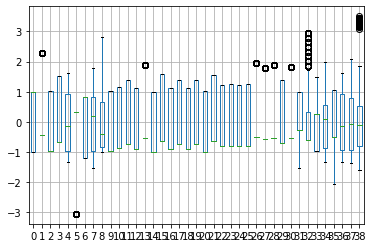

In [441]:
pd.DataFrame(Xf_std).boxplot()

### Evaluating model using Recursive Feature Elimination (RFE)

In [461]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5, step = 10, verbose=1)

rfe.fit(Xf_train, yf_train)

#print(dict(zip(Xf.columns, rfe.ranking_)))

print('Chosen Columns : ', Xf.columns[rfe.support_])

acc = accuracy_score(yf_test, rfe.predict(Xf_test))
print("\n{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 39 features.
Fitting estimator with 29 features.
Fitting estimator with 19 features.
Fitting estimator with 9 features.
Chosen Columns :  Index(['tenure', 'TotalCharges', 'InternetService_Fiber optic',
       'Contract_Two year', 'TenureYear'],
      dtype='object')

78.5% accuracy on test set.


In [474]:
rf = RandomForestClassifier(random_state=0)
rf.fit(Xf_train, yf_train)

acc = accuracy_score(yf_test, rf.predict(Xf_test))
print(pd.Series(rf.feature_importances_.round(2), X.columns, ).sort_values())

print("\n{0:.1%} accuracy on test set.".format(acc))

mask = rf.feature_importances_ > 0.02

reduced_df_rfe_rf = X.loc[:, X.columns[mask]]

# prints out the selected column names
print('Columns after feature selection : ', list(reduced_df_rfe_rf.columns))

PhoneService                             0.00
InternetService_No                       0.00
DeviceProtection_Yes                     0.01
StreamingTV_Yes                          0.01
StreamingTV_No                           0.01
TechSupport_Yes                          0.01
Contract_One year                        0.01
Contract_Two year                        0.01
DeviceProtection_No                      0.01
OnlineBackup_Yes                         0.01
OnlineBackup_No                          0.01
OnlineSecurity_Yes                       0.01
PaymentMethod_Credit card (automatic)    0.01
StreamingMovies_Yes                      0.01
InternetService_DSL                      0.01
MultipleLines_Yes                        0.01
MultipleLines_No                         0.01
PaymentMethod_Mailed check               0.01
Dependents                               0.01
Partner                                  0.01
PhoneRatio                               0.01
StreamingMovies_No                

In [475]:
#{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
# criterion= 'entropy', max_depth= 4, max_features= 'auto', min_samples_leaf= 0.1, min_samples_split= 0.1

rfe = RFE(estimator=RandomForestClassifier(n_estimators = 300, criterion= 'entropy', max_depth= 4, max_features= 'auto', min_samples_leaf= 0.1, min_samples_split= 0.1), 
          n_features_to_select=10, step = 5, verbose=1)

rfe.fit(Xf_train, yf_train)

mask = rfe.support_

reduced_Xf = Xf.loc[:, mask]
print('Columns after selection : ', list(reduced_Xf.columns))

acc = accuracy_score(yf_test, rfe.predict(Xf_test))
print("\n{0:.1%} accuracy on test set.".format(acc))

Fitting estimator with 39 features.
Fitting estimator with 34 features.
Fitting estimator with 29 features.
Fitting estimator with 24 features.
Fitting estimator with 19 features.
Fitting estimator with 14 features.
Columns after selection :  ['tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'TechSupport_No', 'Contract_Two year', 'PaymentMethod_Electronic check', 'ContractMonthsRemaining', 'TenureYear', 'AvgCostPerService']

79.0% accuracy on test set.


## Conclusion

The average performance after fitting several models was observed to be around **78 to 80%.**\
Though this may look like a poor score, it is actually not that bad. This is further justfied with the help of the plot of the **data distribution in 2 dimensions after applying PCA.**

It is clear that there is no inherent separation among the datapoints.

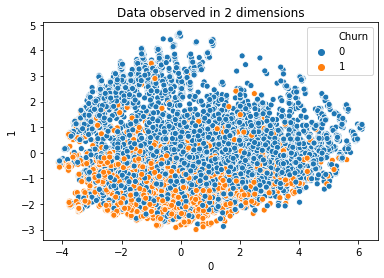

In [473]:
pc = pca.fit_transform(Xf)
pc_df = pd.DataFrame(pc[:,:5])
pc_df = pd.concat([pc_df, telco_df.Churn], axis = 1)

sns.scatterplot(x = pc_df.iloc[:,0], y = pc_df.iloc[:,1], hue=pc_df.Churn)
plt.title('Data observed in 2 dimensions')
plt.show()

Using the insights provided in **Section 2**, the major contributors to churn can be analysed by the organisation to get more meaning behind the reason for customer churn